In [ ]:
!pip install -q deepface kaggle opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.9/288.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.1 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import files

print("📂 Upload your kaggle(2).json")
uploaded = files.upload()

# Get the actual uploaded filename
kaggle_filename = list(uploaded.keys())[0]

# Save it as kaggle.json in the right path
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "wb") as f:
    f.write(uploaded[kaggle_filename])
os.chmod("/root/.kaggle/kaggle.json", 600)


📂 Upload your kaggle(2).json


Saving kaggle (2).json to kaggle (2).json


In [ ]:
!kaggle datasets list -s lfw


ref                                                title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atulanandjha/lfwpeople                             LFW - People (Face Recognition)                 243503888  2019-11-15 19:45:43.120000          47305        483  1.0              
quadeer15sh/lfw-facial-recognition                 LFW - Facial Recognition                        288243907  2022-06-12 07:55:33.590000           1403         56  0.9411765        
jessicali9530/lfw-dataset                          Labelled Faces in the Wild (LFW) Dataset        117895655  2018-05-17 19:57:27.373000          51106        344  0.7647059        
stoicstatic/face-recognition-dataset               Face Recognition Dataset - Oneshot Lear

In [ ]:
!kaggle datasets download -d atulanandjha/lfwpeople --unzip -p lfw_data


Dataset URL: https://www.kaggle.com/datasets/atulanandjha/lfwpeople
License(s): GNU Lesser General Public License 3.0
 52% 121M/232M [00:00<00:00, 1.26GB/s]
100% 232M/232M [00:00<00:00, 778MB/s] 


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tarfile
import os

import os

# Show sample folders and image paths from dataset
base_path = "lfw_data"
for person in os.listdir(base_path)[:5]:  # just check 5 folders
    print("📁", person)
    person_path = os.path.join(base_path, person)
    if os.path.isdir(person_path):
        images = os.listdir(person_path)
        print("    🖼️", images[:2])  # show first 2 images for each


📁 pairsDevTrain.txt
📁 lfw-funneled.tgz
📁 pairs.txt
📁 pairsDevTest.txt
📁 lfw_funneled
    🖼️ ['Ronald_White', 'Alfredo_Pena']


In [ ]:
# Use working image paths from the actual unpacked dataset
img1_path = "lfw_data/lfw_funneled/Ronald_White/Ronald_White_0001.jpg"
img2_path = "lfw_data/lfw_funneled/Alfredo_Pena/Alfredo_Pena_0001.jpg"


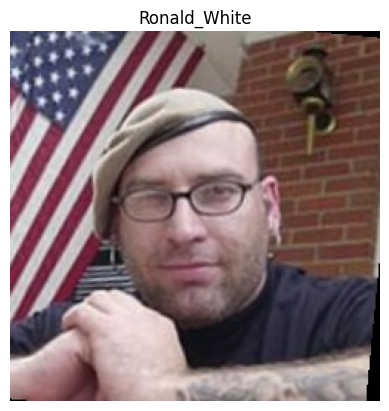

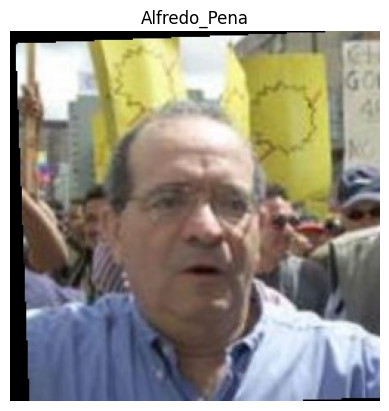

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Could not load image at {img_path}")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(img_path.split("/")[-2])
        plt.axis("off")
        plt.show()

show_image(img1_path)
show_image(img2_path)


In [ ]:
from deepface import DeepFace

print("🔍 Comparing faces...")

result = DeepFace.verify(img1_path, img2_path)

print("✅ Match:", result["verified"])
print("📏 Distance:", result["distance"])
print("📊 Model used:", result["model"])


25-08-02 14:31:15 - Directory /root/.deepface has been created
25-08-02 14:31:15 - Directory /root/.deepface/weights has been created
🔍 Comparing faces...
25-08-02 14:31:16 - 🔗 vgg_face_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 to /root/.deepface/weights/vgg_face_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:14<00:00, 40.2MB/s]


✅ Match: False
📏 Distance: 0.893723
📊 Model used: VGG-Face
